
# Proyecto 1
#### Cristina Bautista - 161260
#### Abril Palencia - 18198 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
# from pandas_profiling import ProfileReport
import re


%matplotlib inline

In [2]:
df1 = pd.read_csv('dataset/dataset-part1.csv')
df2 = pd.read_csv('dataset/dataset-part2.csv')
df3 = pd.read_csv('dataset/dataset-part3.csv')
df4 = pd.read_csv('dataset/dataset-part4.csv')

In [3]:
df_final = pd.concat([df1, df2, df3, df4])

In [5]:
df_final = df_final.drop(labels=['FIREWALL_EVENT', 'FLOW_ACTIVE_TIMEOUT', 'FLOW_DURATION_MICROSECONDS', 'FLOW_END_SEC', 
                          'FLOW_INACTIVE_TIMEOUT', 'FLOW_START_SEC', 'FRAME_LENGTH', 'IPV4_DST_ADDR', 
                          'IPV4_SRC_ADDR', 'MAX_IP_PKT_LEN', 'MAX_IP_PKT_LEN', 'MIN_IP_PKT_LEN', 'PROTOCOL_MAP', 
                          'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS', 'RETRANSMITTED_OUT_BYTES', 
                          'RETRANSMITTED_OUT_PKTS', 'DST_TO_SRC_SECOND_BYTES', 'SRC_TO_DST_SECOND_BYTES', 
                          'L7_PROTO_NAME'], axis=1)

In [6]:
df_final_prueba = df_final.sample(n = 1000000)

In [7]:
df_final_prueba['LABEL'].value_counts()

Normal flow                       842201
SYN Scan - aggressive              62292
Denial of Service R-U-Dead-Yet     56361
Denial of Service Slowloris        21451
UDP Scan                           17149
NULL Scan                            210
FIN Scan                             189
XMAS Scan                            147
Name: LABEL, dtype: int64

In [8]:
valores = ['UDP Scan', 'NULL Scan', 'XMAS Scan', 'FIN Scan']

In [9]:
df_final_prueba = df_final_prueba[df_final_prueba['LABEL'].isin(valores) == False]

In [10]:
valores2 = [47, 58]

In [11]:
df_final_prueba = df_final_prueba[df_final_prueba['PROTOCOL'].isin(valores2) == False]

In [12]:
df_final_prueba['LABEL'].value_counts()

Normal flow                       842170
SYN Scan - aggressive              62292
Denial of Service R-U-Dead-Yet     56361
Denial of Service Slowloris        21451
Name: LABEL, dtype: int64

In [13]:
df_final_prueba['LABEL'].replace({"Normal flow": 0, "Denial of Service R-U-Dead-Yet": 1,
                          "Denial of Service Slowloris": 2, "SYN Scan - aggressive": 3}, inplace=True)

In [14]:
slowloris = df_final_prueba[df_final_prueba['LABEL'] == 2]
denial_dead = df_final_prueba[df_final_prueba['LABEL'] == 1]

In [15]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

In [16]:
sorted(Counter(df_final_prueba['LABEL']).items())

[(0, 842170), (1, 56361), (2, 21451), (3, 62292)]

0    842170
3     62292
1     56361
2     21451
Name: LABEL, dtype: int64

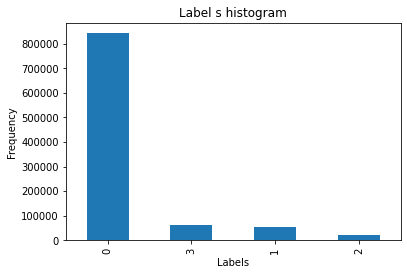

In [17]:
pd.value_counts(df_final_prueba['LABEL']).plot.bar()
plt.title('Label s histogram')
plt.xlabel('Labels')
plt.ylabel('Frequency')
df_final_prueba['LABEL'].value_counts()

In [26]:
X = df_final_prueba
y = df_final_prueba[['LABEL']]
X.drop(['LABEL'], axis=1)

,BIFLOW_DIRECTION,DIRECTION,FIRST_SWITCHED,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_ID,FLOW_START_MILLISECONDS,IN_BYTES,IN_PKTS,L4_DST_PORT,...,TCP_WIN_MIN_IN,TCP_WIN_MIN_OUT,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP
1976399,1,0,1618215281,30,1618215281910,79227890,1618215281880,143,2,443,...,83,322,0,0,0,0,0,0,1,79227890
553319,1,0,1622188312,0,1622188312133,1919426,1622188312132,48,1,8728,...,8192,0,1412,0,0,0,0,0,1,1919426
14075490,1,0,1622440914,0,1622440914862,21137735,1622440914862,40,1,51296,...,1024,0,0,0,0,0,0,0,1,21137735
4496335,1,0,1622437911,0,1622437911211,11558580,1622437911211,40,1,1216,...,1024,0,0,0,0,0,0,0,1,11558580
14980466,1,0,1622441070,0,1622441070247,22042711,1622441070247,40,1,1019,...,1024,0,0,0,0,0,0,0,1,22042711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3263743,1,0,1622437697,0,1622437697630,10325988,1622437697630,40,1,736,...,1024,0,0,0,0,0,0,0,1,10325988
15025555,1,0,1622441077,0,1622441077970,22087800,1622441077970,40,1,34845,...,1024,0,0,0,0,0,0,0,1,22087800
1290298,1,0,1622437355,0,1622437355803,8352543,1622437355803,40,1,58461,...,1024,0,0,0,0,0,0,0,1,8352543
26517742,1,0,1622455315,15,1622455315598,33579987,1622455315583,148,2,53,...,0,0,0,0,0,0,0,0,1,33579987


In [27]:
# y = pd.DataFrame(y)

In [34]:
y.value_counts()

LABEL
0        842170
3         62292
1         56361
2         21451
dtype: int64

In [28]:
X.shape, y.shape#y.reshape(-1,1)

((982274, 31), (982274, 1))

In [29]:
ros = RandomOverSampler(random_state=5)
X_resample, y_resample = ros.fit_resample(X, y)

In [35]:
y_resample.value_counts()

LABEL
0        842170
1        842170
2        842170
3        842170
dtype: int64